In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# EDA


## 1. Data Collection

In [38]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

df.columns = [col.replace(' ', '_') for col in df.columns]
df_labels = df.drop(columns={'target'})
df_target = df.target
target_names = cancer.target_names
print("Class 0:", target_names[0])  # Malignant
print("Class 1:", target_names[1]) 


Class 0: malignant
Class 1: benign


## 2. Data Cleaning

### Checking the `Data Type `

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

### Checking `Null Values` or `missing values`

In [4]:
null_sum = df.isnull().sum()
count_rows = df.count()
null_percentage = ( null_sum / count_rows ) * 100
null_df = pd.DataFrame({'Null Count': null_sum, 'Total Count': count_rows, 'Null Percentage': null_percentage})
null_df

,Null Count,Total Count,Null Percentage
mean_radius,0,569,0.0
mean_texture,0,569,0.0
mean_perimeter,0,569,0.0
mean_area,0,569,0.0
mean_smoothness,0,569,0.0
mean_compactness,0,569,0.0
mean_concavity,0,569,0.0
mean_concave_points,0,569,0.0
mean_symmetry,0,569,0.0
mean_fractal_dimension,0,569,0.0


### Checking for `Outliers`

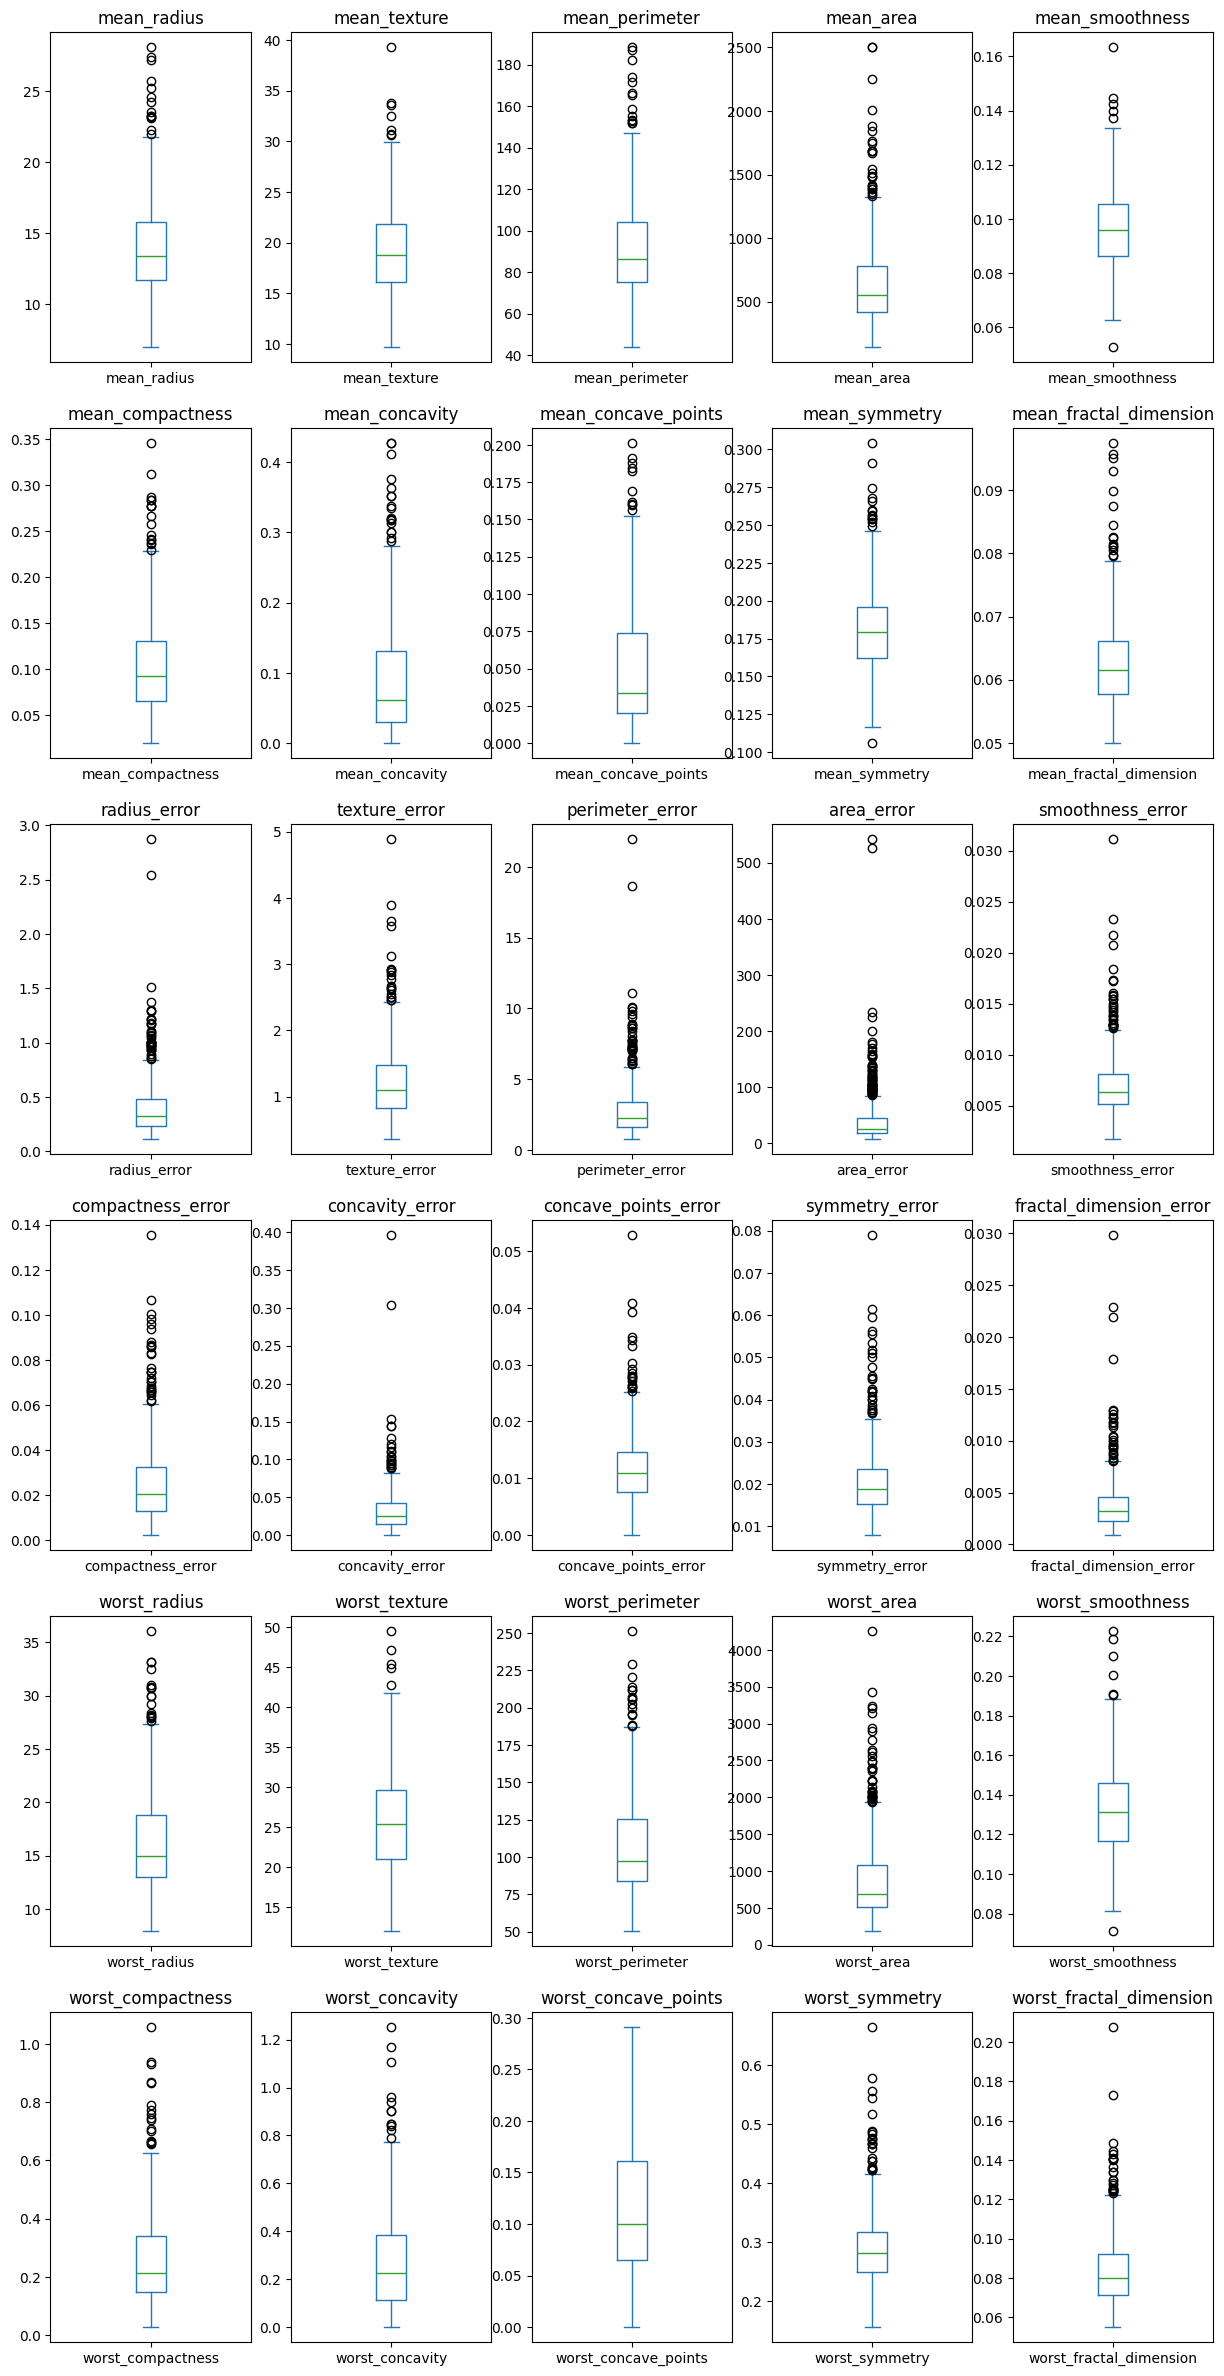

In [5]:
num_cols = 5
num_rows = (df_labels.shape[1] + num_cols - 1) //num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_labels.shape[1]:
        df_labels.iloc[:, i].plot(kind='box',ax=ax)
        ax.set_title(df_labels.columns[i])

## 3. Descriptive Statistics

In [12]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 4. Univariate Analysis

### Checking the `Distribution` of the Dataset

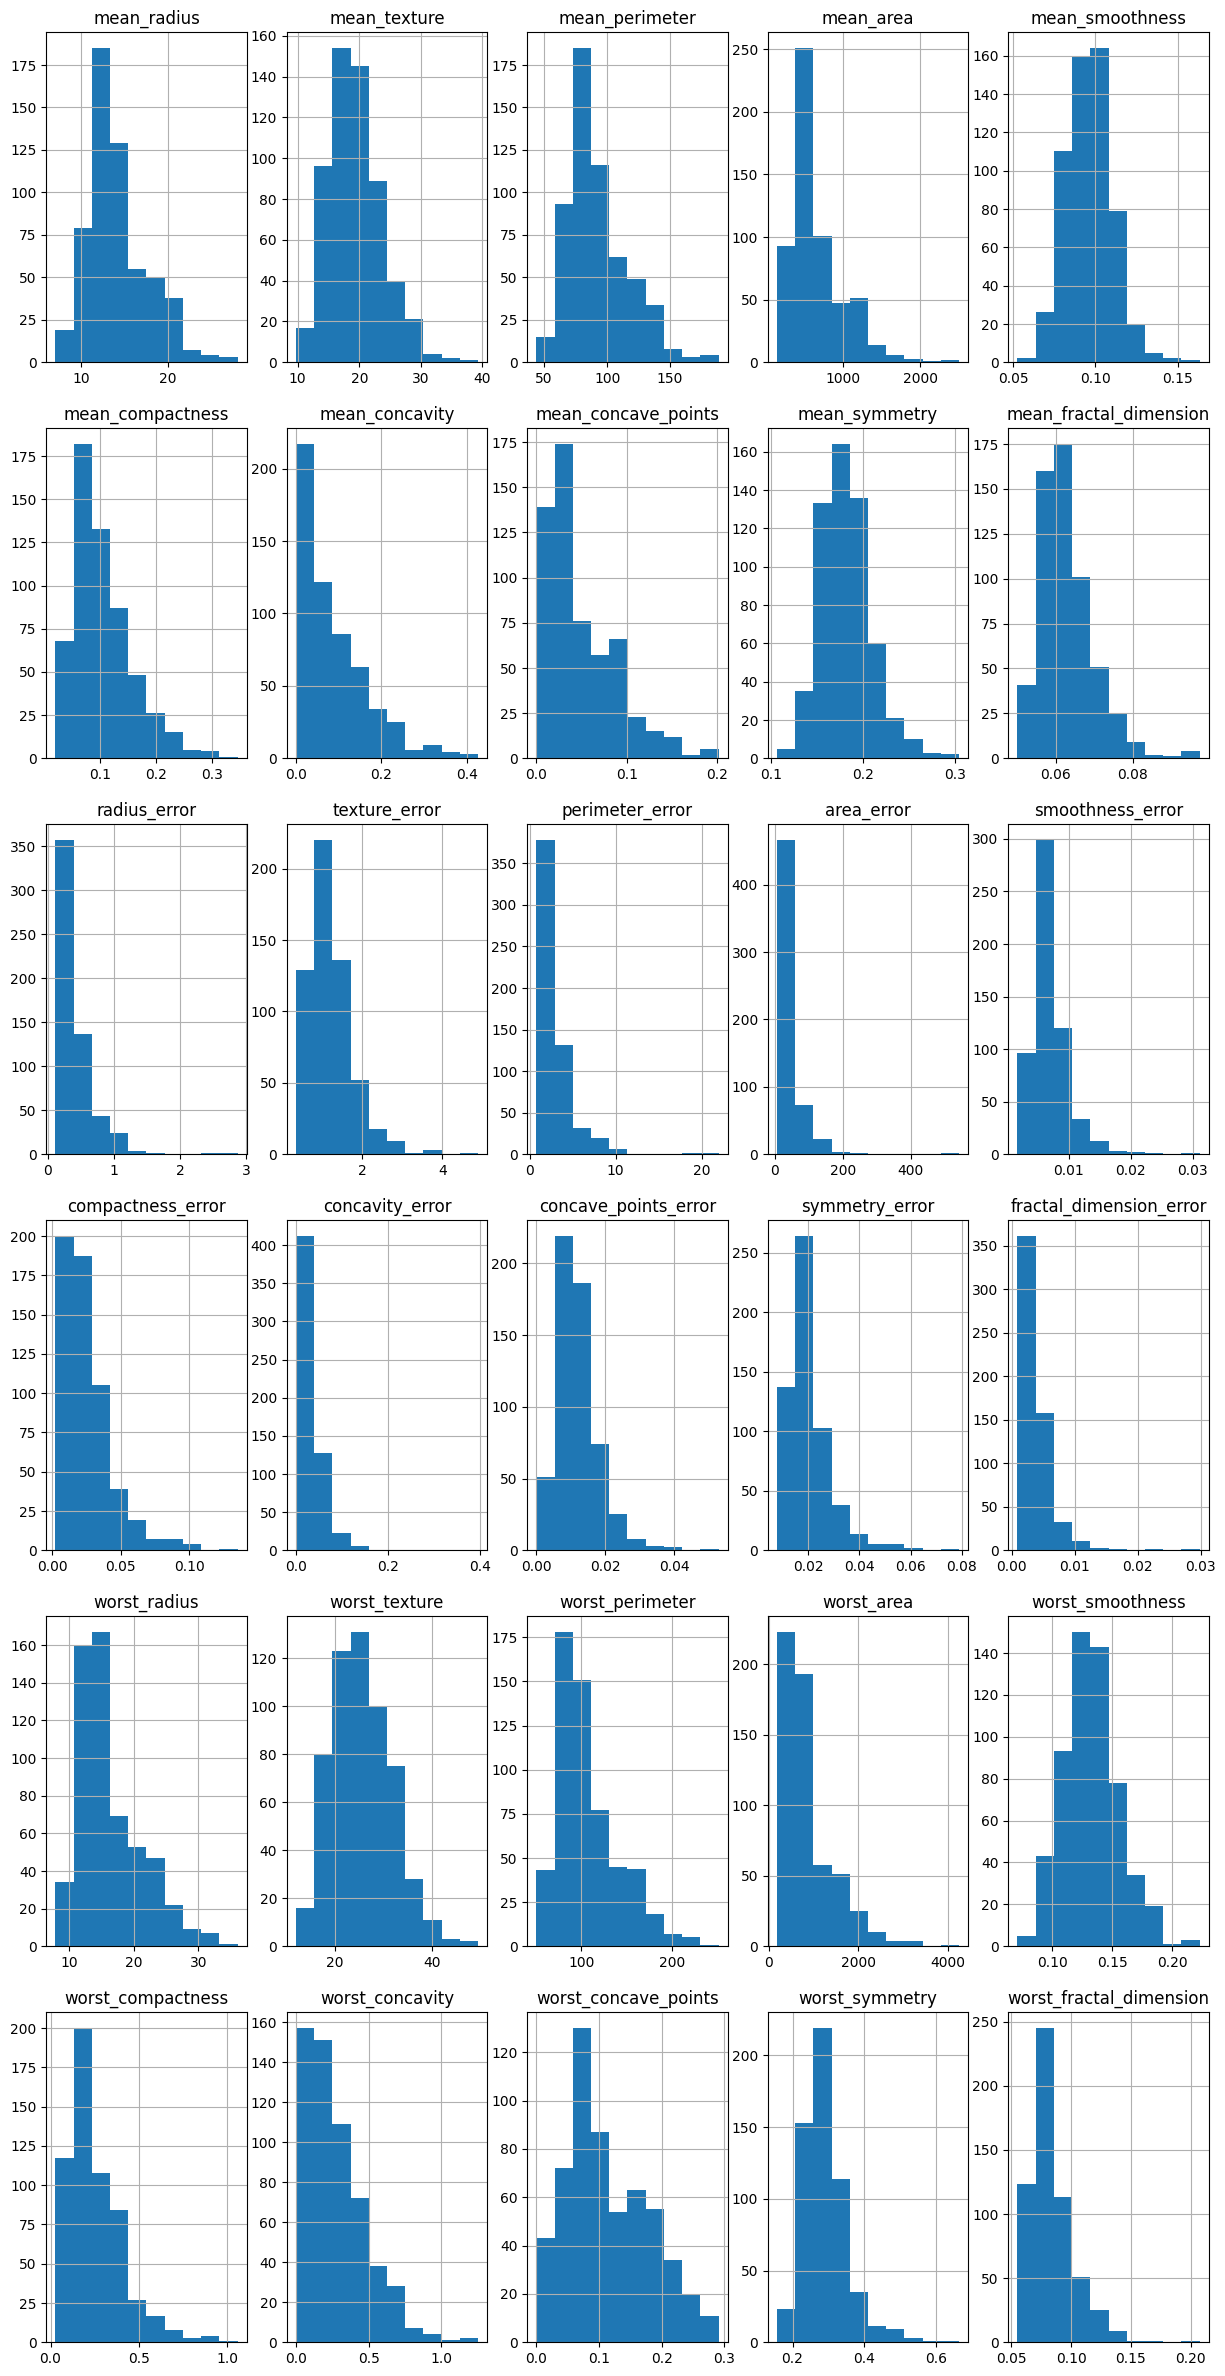

In [6]:
num_cols = 5
num_rows = (df_labels.shape[1] + num_cols - 1) //num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_labels.shape[1]:
        df_labels.iloc[:, i].hist(ax=ax)
        ax.set_title(df_labels.columns[i])


### Checking the `skewness` of the Dataset

In [7]:
from scipy.stats import skew
skewness = skew(df_labels)
print("Skewness of the dataset:")
print(skewness)

Skewness of the dataset:
[0.93989345 0.64873357 0.98803695 1.64139051 0.45511992 1.18698332
 1.39748324 1.16809035 0.72369472 1.30104739 3.08046399 1.64210026
 3.43453047 5.43281586 2.30834422 1.89720239 5.09698095 1.44086689
 2.18934184 3.91361665 1.10020504 0.49700667 1.12518762 1.85446799
 0.41433005 1.46966746 1.14720234 0.49131594 1.43014487 1.65819316]


In [10]:
skewness = df_labels.skew()
print("Skewness of the dataset:")
print(skewness)

Skewness of the dataset:
mean_radius                0.942380
mean_texture               0.650450
mean_perimeter             0.990650
mean_area                  1.645732
mean_smoothness            0.456324
mean_compactness           1.190123
mean_concavity             1.401180
mean_concave_points        1.171180
mean_symmetry              0.725609
mean_fractal_dimension     1.304489
radius_error               3.088612
texture_error              1.646444
perimeter_error            3.443615
area_error                 5.447186
smoothness_error           2.314450
compactness_error          1.902221
concavity_error            5.110463
concave_points_error       1.444678
symmetry_error             2.195133
fractal_dimension_error    3.923969
worst_radius               1.103115
worst_texture              0.498321
worst_perimeter            1.128164
worst_area                 1.859373
worst_smoothness           0.415426
worst_compactness          1.473555
worst_concavity            1.150237
wor

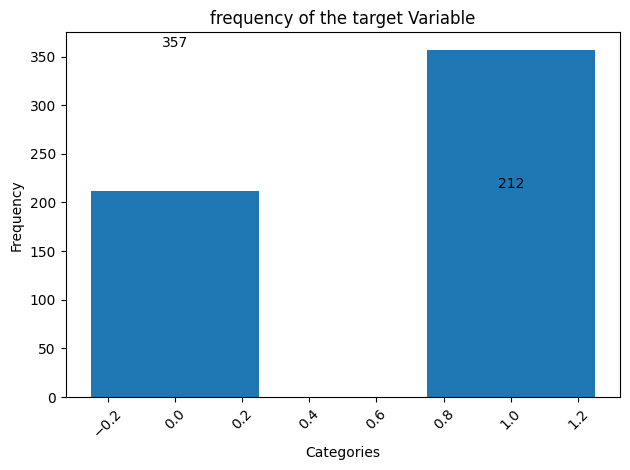

In [35]:
value_counts = df_target.value_counts()

plt.bar(value_counts.index, height=value_counts.values, width=0.5)
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('frequency of the target Variable')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## 5. Bivariate Analysis

<Axes: >

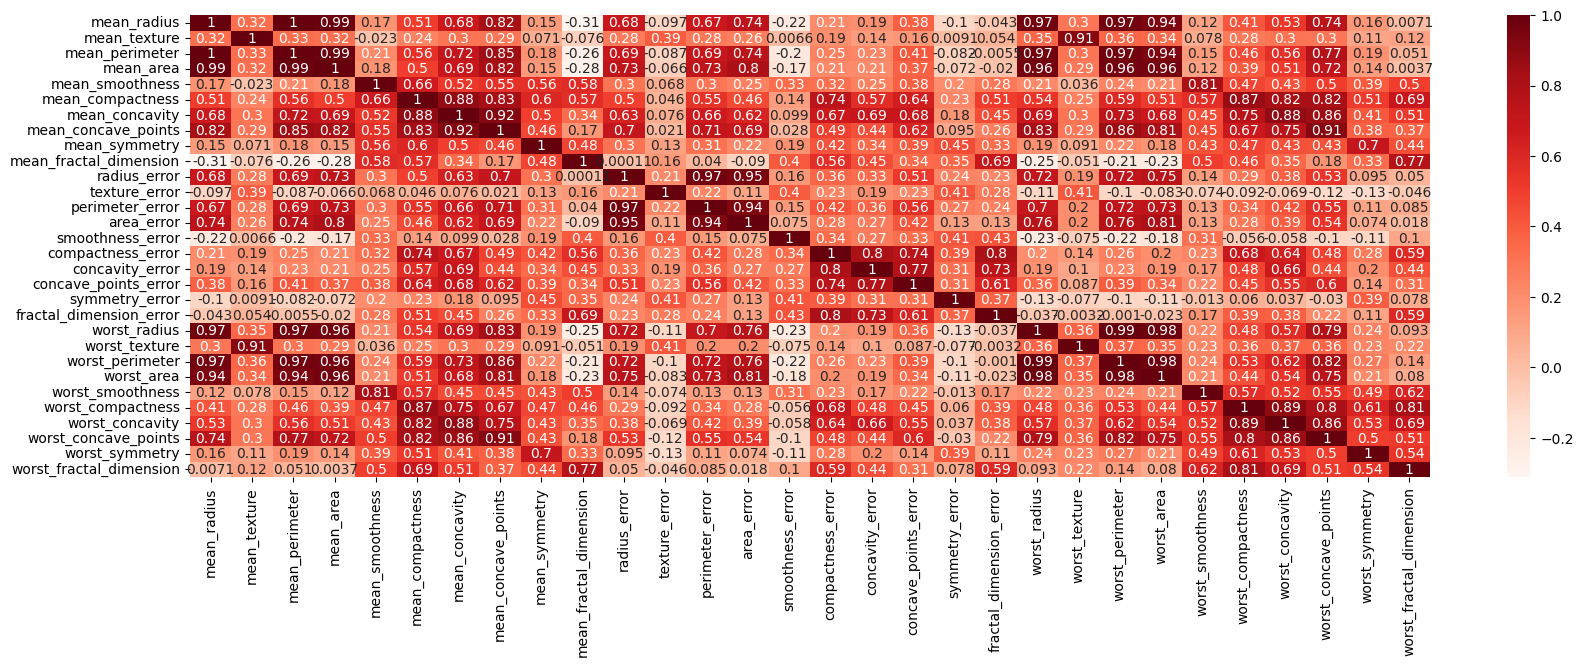

In [52]:
plt.figure(figsize=(20,6))
corr_matrix = df_labels.corr(numeric_only=True)
sns.heatmap(corr_matrix,cmap='Reds',annot=True)

## 6. Feature Engineering

In [59]:
df_encoded_Labels = df_labels.copy()
scalar = StandardScaler()
df_encoded_Labels = scalar.fit_transform(df_encoded_Labels)

In [63]:
X = df_encoded_Labels
Y = df_target.copy()

## 7. Model Training

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=7)
print("The shape xtrain: ", xtrain.shape)
print("The shape xtest: ",xtest.shape)
print("The shape of ytrain: ",ytrain.shape)
print("The shape of ytest", ytest.shape)

The shape xtrain:  (398, 30)
The shape xtest:  (171, 30)
The shape of ytrain:  (398,)
The shape of ytest (171,)


In [67]:
log_reg_model = LogisticRegression()

In [68]:
log_reg_model.fit(xtrain,ytrain)

LogisticRegression()

In [69]:
prediction = log_reg_model.predict(xtest)
accuracy = accuracy_score(y_true=ytest,y_pred=prediction)
classificationreport = classification_report(y_true=ytest,y_pred=prediction,target_names=target_names)

In [70]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:")
print(classificationreport)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        55
      benign       0.96      1.00      0.98       116

    accuracy                           0.97       171
   macro avg       0.98      0.95      0.97       171
weighted avg       0.97      0.97      0.97       171



In [74]:
weights = log_reg_model.coef_ 
bias = log_reg_model.intercept_

print("The trained weights are", weights)
print("The Bias (c) is", bias)

The trained weights are [[-0.28837871 -0.68596377 -0.26544995 -0.35428519 -0.07186302  0.53979194
  -0.75904182 -0.9968598   0.11694388  0.23457574 -1.30192645  0.10797502
  -0.76422539 -0.959405    0.15104753  0.60428836  0.26187918 -0.25432471
   0.06194988  0.63681108 -0.82752455 -0.65676321 -0.6946259  -0.81149626
  -0.9428086   0.1128204  -0.87223832 -0.80592939 -0.70990985 -0.65412818]]
The Bias (c) is [0.28645356]


0.9899497487437185